## UMAP Spring 2022 Research Recap


# WARNING
The current notebook will not work on your session without a list of custom packages and data sets. This installation is currently being developed. A functional prototype can be found on the sfsu VM under 921642160 using the "rapids-22.04" conda environment. 

# An overview of Unifold Manifold Approximate Projection

UMAP ( uniform manifold approximate projection) is a dimensionality reduction technique that leverages new advances in a field of computer science known as manifold learning. This algorithm was largely developed to respond to the shortcomings of the previous leading dimensionality reduction algorithm TSNE which preforms dimensionality reduction by constructing a complete global covariance matrix to compute the lower dimensional embedding.

TSNE is a non linear method that after constructing this covariance matrix stochastically initializes random points in the high dimensional space and optimizes an embedding using gradient descent, optimizing over KL divergence. While TSNE does an excellent job at preserving local structure in high dimensional input spaces, it suffers with preserving global structure and scales poorly in time complexity for large data sets. For more information see the following link: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

**Original TSNE paper:** https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

UMAP is an algorithm that functions by first constructing a nearest neighbor graph over a simplical complex constructed over the manifold defined by the input data. This graph is constructed using a novel initializtion method called Nearest Neighbor Descent which iteratively prunes a fully connected graph until a desired number of neighbors is identified for each point.For more information on the initialization step see the following link: https://pynndescent.readthedocs.io/en/latest/. After constructing this graph over the manifold the graph is attempted to be embedded into a lower dimensional ambient space using a reimannian metric to govern the preservation of the notion of distance. The larger philosophy of UMAP is that assuming that the data is uniformally distributed this construction is mathematically sound. The embedding is later optimized using cross entropy and stochastic gradient descent. 

UMAP is a powerful new tool that has made large impacts in the bioinformatics sector as well as other tangential domains of science in which high dimensional data needs to be visualized in a way that shed insight into both the the local and global structure. 

**Original UMAP paper:**https://arxiv.org/pdf/1802.03426.pdf


# Running Umap

The following cells will run a basic test on UMAP, defining hyperparameters and exhibiting the syntax for function calls.

By default N is set to 10,000 generating 4D vectors.

Data is colored based on the value of the randomly generated value. In this test data is randomly generated using a uniform distribution. Note that for higher values of N we obtain convergence to the geometry of statistical distributions in higher dimensions.

In [35]:
import numpy as np
#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#UMAP
import umap
import umap.plot

%matplotlib notebook

In [13]:
np.random.seed(42)
N=10000
neighbors=15
dim=3
epochs=1000
dist=.1
data = np.random.rand(N, 4)

In [ ]:
#UMAP step below: Calling constructor for umap embedding object
fit = umap.UMAP(n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1 )
u1 = fit.fit_transform(data)

<IPython.core.display.Javascript object>


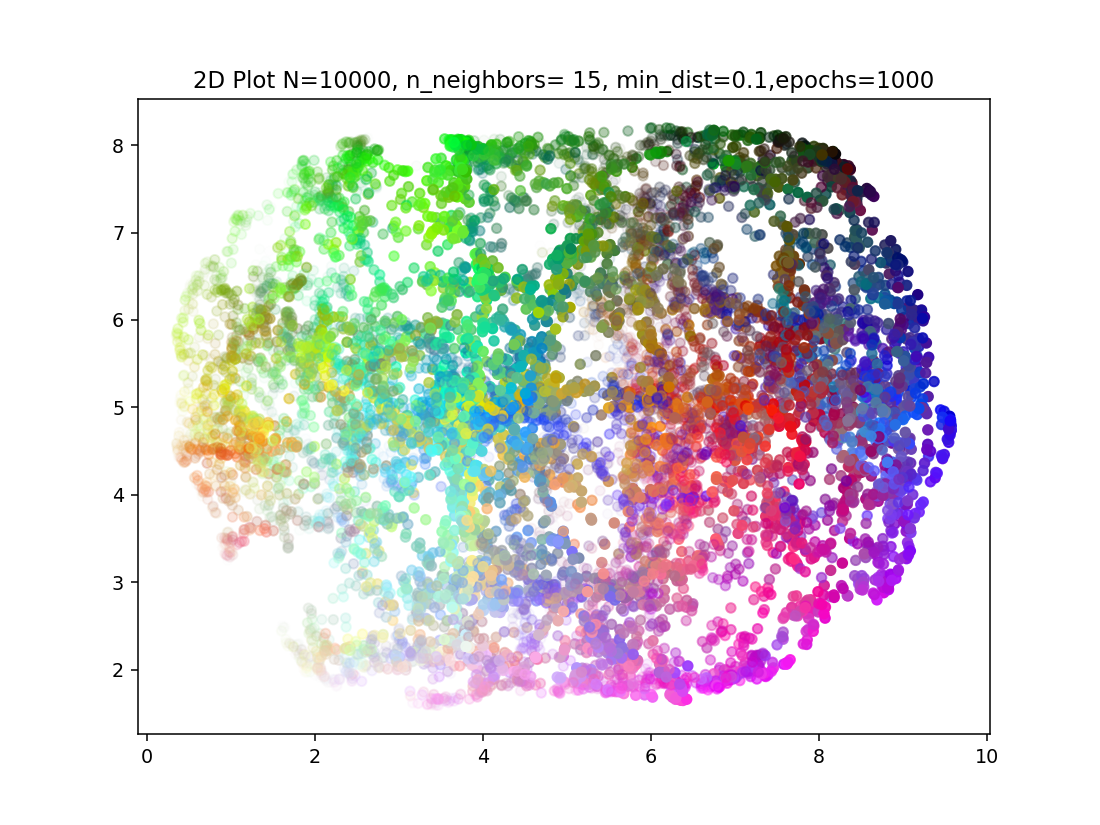

In [31]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(u1[:,0], u1[:,1], c=data,s=25)
plt.title('2D Plot N={}, n_neighbors= {}, min_dist={},epochs={}'.format(N,neighbors,dist,epochs));


<IPython.core.display.Javascript object>


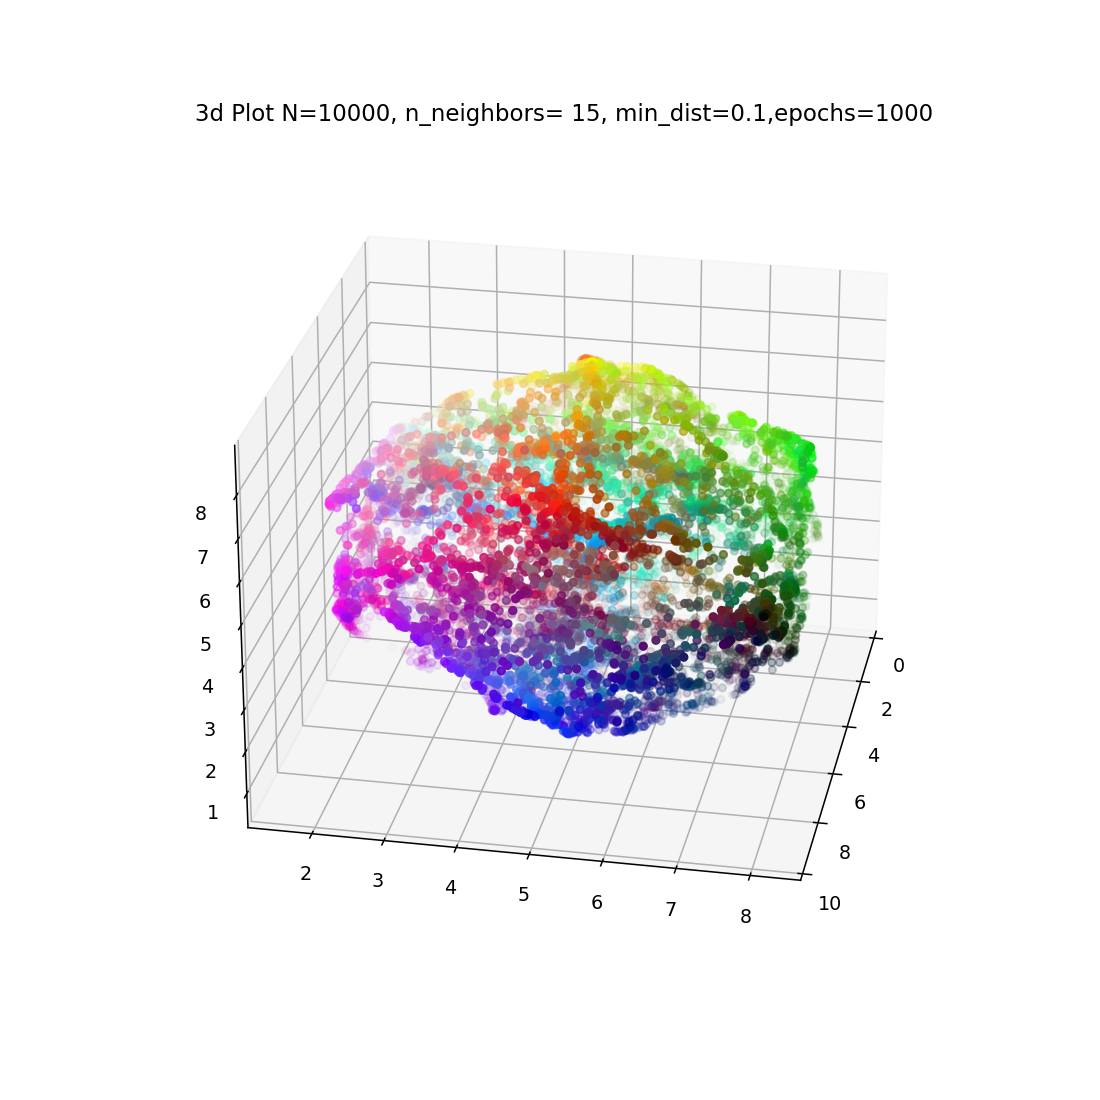

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.title('3d Plot N={}, n_neighbors= {}, min_dist={},epochs={}'.format(N,neighbors,dist,epochs));
ax.scatter(u1[:,0], u1[:,1], u1[:,2], c=data, s=15)

# UMAP on different statistical distributions


We will now display the behvaior of umap on large samples of statistical distributions. We will be plotting the Uniform and normal distributions embedded from 4 dimensions to three to display their geometry. 

# Normal Distribution: 500,000 4D vectors

In [33]:
np.random.seed(42)
N=500000
data = np.random.randn(N, 4)
data=(data - np.min(data)) / (np.max(data) -np.min(data))
neighbors=20
dim=3
epochs=1000
dist=.1

In [34]:
fit = umap.UMAP(n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1 )
u1 = fit.fit_transform(data)

UMAP(n_components=3, n_epochs=1000, n_neighbors=20, verbose=1)
Mon May  9 08:04:08 2022 Construct fuzzy simplicial set
Mon May  9 08:04:08 2022 Finding Nearest Neighbors
Mon May  9 08:04:08 2022 Building RP forest with 40 trees
Mon May  9 08:04:10 2022 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Mon May  9 08:04:35 2022 Finished Nearest Neighbor Search
Mon May  9 08:04:40 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon May  9 08:24:10 2022 Finished embedding


<IPython.core.display.Javascript object>


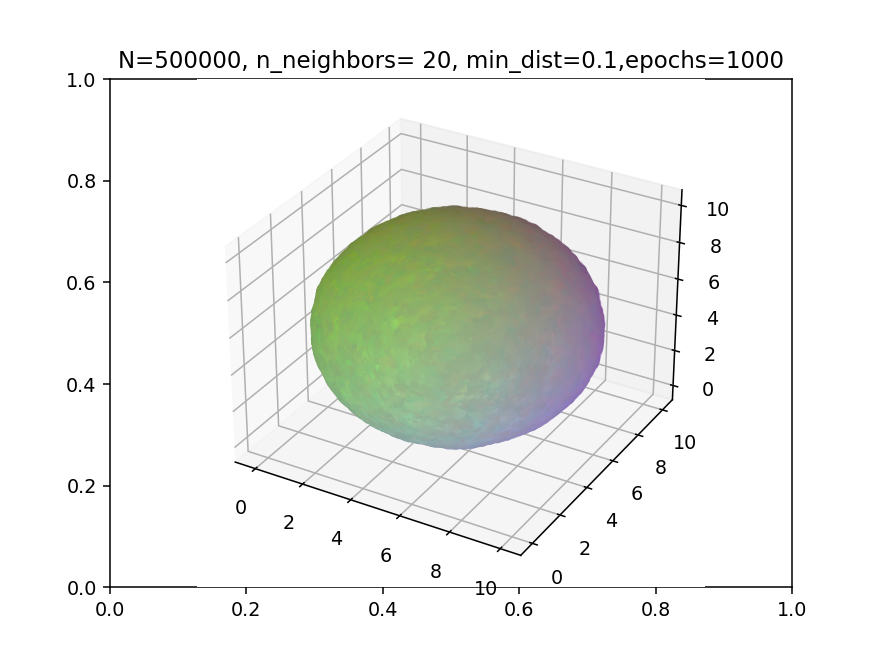

In [35]:
fig = plt.figure()
plt.title('N={}, n_neighbors= {}, min_dist={},epochs={}'.format(N,neighbors,dist,epochs));
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u1[:,0], u1[:,1], u1[:,2], c=data, s=15)

# Uniform Distribution 

In [36]:
np.random.seed(42)
N=500000
data = np.random.rand(N, 4)
#data=(data - np.min(data)) / (np.max(data) -np.min(data))
neighbors=20
dim=3
epochs=1000
dist=.1

In [37]:
fit = umap.UMAP(n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1 )
u1 = fit.fit_transform(data)

UMAP(n_components=3, n_epochs=1000, n_neighbors=20, verbose=1)
Mon May  9 15:21:46 2022 Construct fuzzy simplicial set
Mon May  9 15:21:46 2022 Finding Nearest Neighbors
Mon May  9 15:21:46 2022 Building RP forest with 40 trees
Mon May  9 15:21:48 2022 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Mon May  9 15:22:12 2022 Finished Nearest Neighbor Search
Mon May  9 15:22:16 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon May  9 15:36:25 2022 Finished embedding


<IPython.core.display.Javascript object>


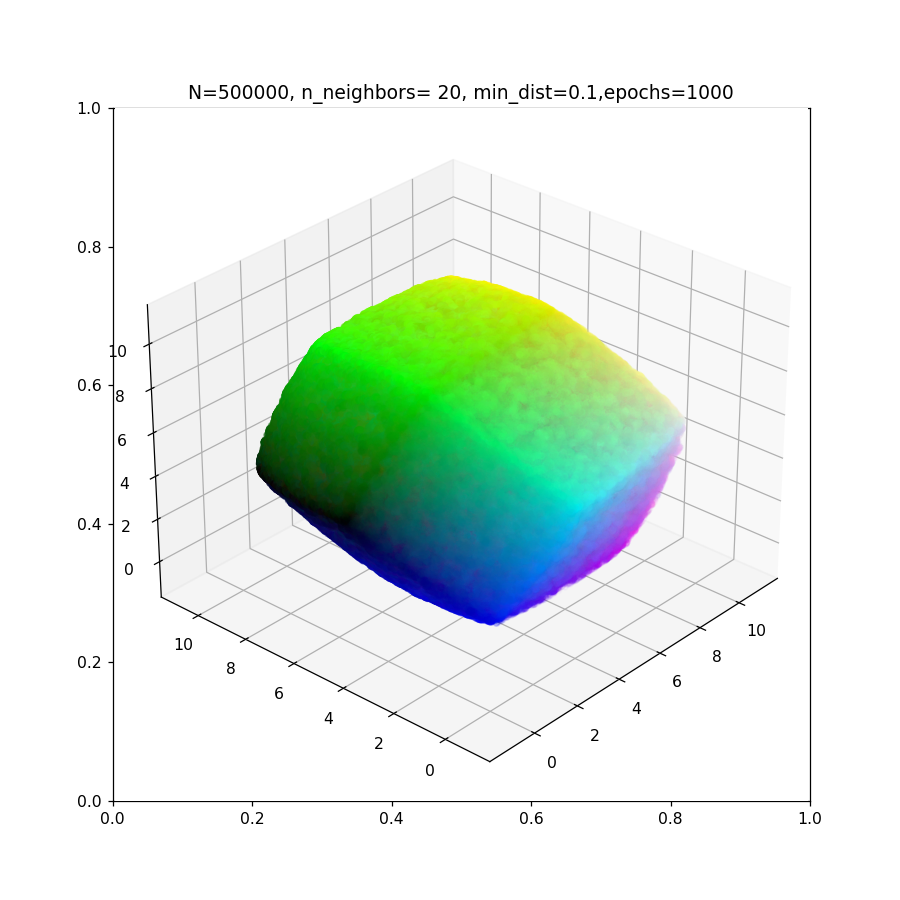

In [39]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
plt.title('N={}, n_neighbors= {}, min_dist={},epochs={}'.format(N,neighbors,dist,epochs));
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u1[:,0], u1[:,1], u1[:,2], c=data, s=15)

# UMAP on MNIST

In [15]:
#Mnist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.preprocessing import normalize

In [16]:
#WARNING DO NOT LOAD UNLESS YOU PLAN TO VISUALIZE MNIST MAY TAKE UPWARDS TO 2 MINUTES 
print("Fetching mnist")
("=========================")
mnist = fetch_openml("mnist_784", version=1)
("=========================")
print("mnist loaded")

Fetching mnist
mnist loaded


In [16]:
neighbors=320
dim=2
epochs=500
dist=.8

In [17]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding = reducer.fit_transform(mnist.data)

UMAP(min_dist=0.8, n_epochs=500, n_neighbors=320, random_state=42, verbose=1)
Mon May  9 10:31:32 2022 Construct fuzzy simplicial set
Mon May  9 10:31:32 2022 Finding Nearest Neighbors
Mon May  9 10:31:32 2022 Building RP forest with 18 trees
Mon May  9 10:31:33 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Mon May  9 10:32:55 2022 Finished Nearest Neighbor Search
Mon May  9 10:33:06 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon May  9 10:39:02 2022 Finished embedding


<IPython.core.display.Javascript object>


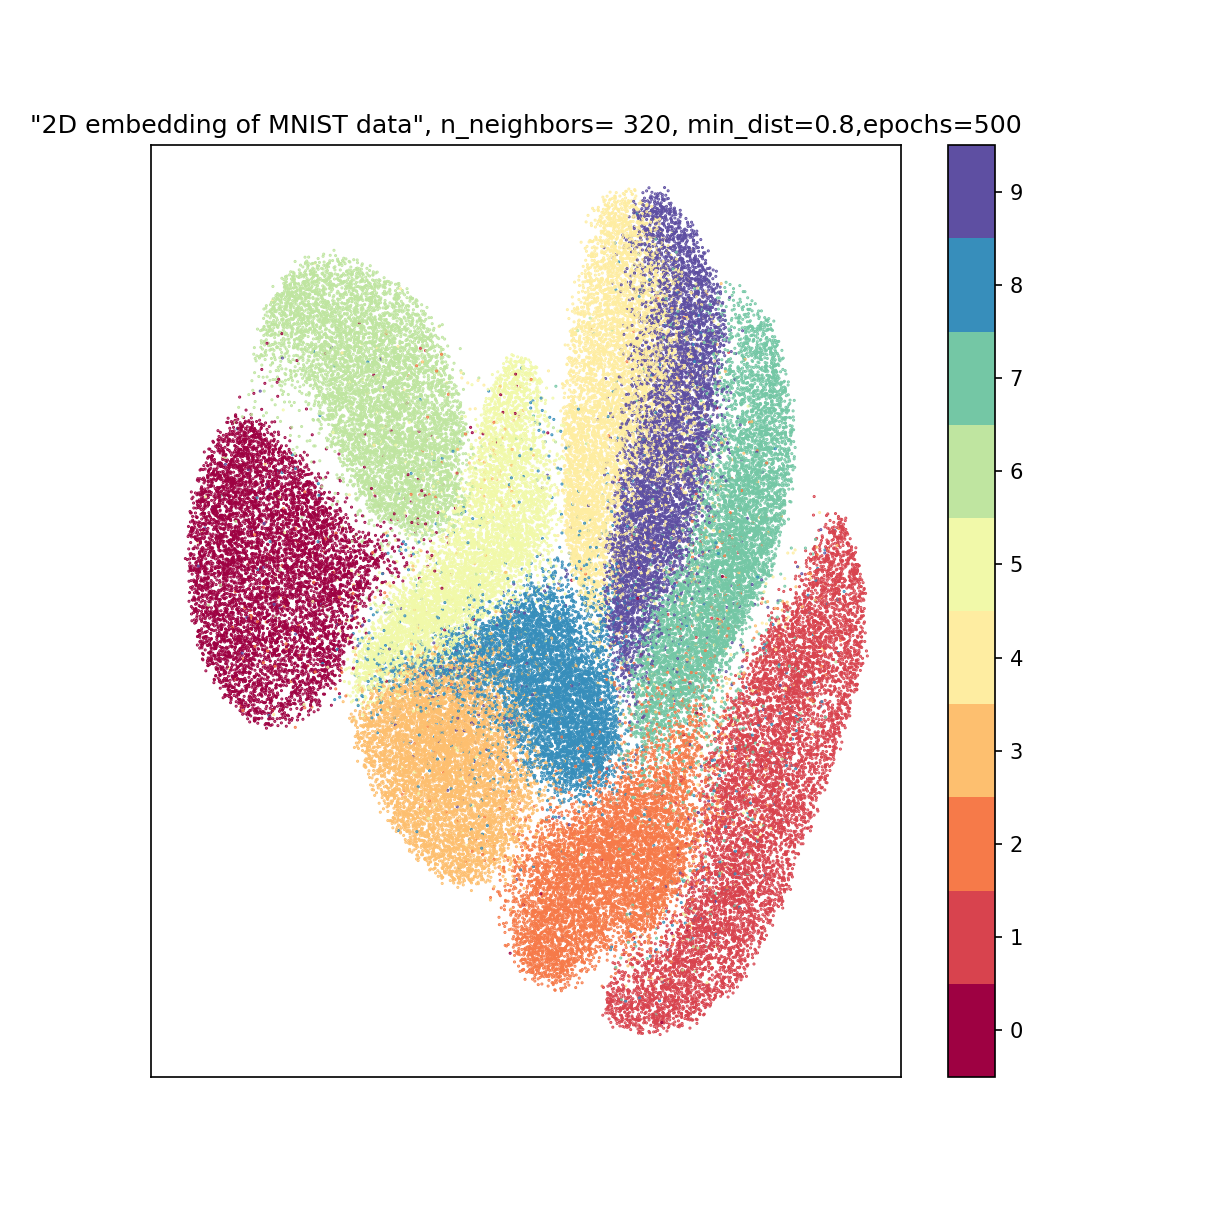

In [19]:
fig, ax = plt.subplots(figsize=(8, 8),dpi=110)
color = mnist.target.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=.2)
plt.setp(ax, xticks=[], yticks=[])
plt.title('"2D embedding of MNIST data", n_neighbors= {}, min_dist={},epochs={}'.format(neighbors,dist,epochs));
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

# 3D embedding 

In [20]:
neighbors=320
dim=3
epochs=500
dist=.8

In [21]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding = reducer.fit_transform(mnist.data)

UMAP(min_dist=0.8, n_components=3, n_epochs=500, n_neighbors=320, random_state=42, verbose=1)
Mon May  9 10:41:10 2022 Construct fuzzy simplicial set
Mon May  9 10:41:10 2022 Finding Nearest Neighbors
Mon May  9 10:41:10 2022 Building RP forest with 18 trees
Mon May  9 10:41:11 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Mon May  9 10:42:33 2022 Finished Nearest Neighbor Search
Mon May  9 10:42:43 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon May  9 10:49:01 2022 Finished embedding


<IPython.core.display.Javascript object>


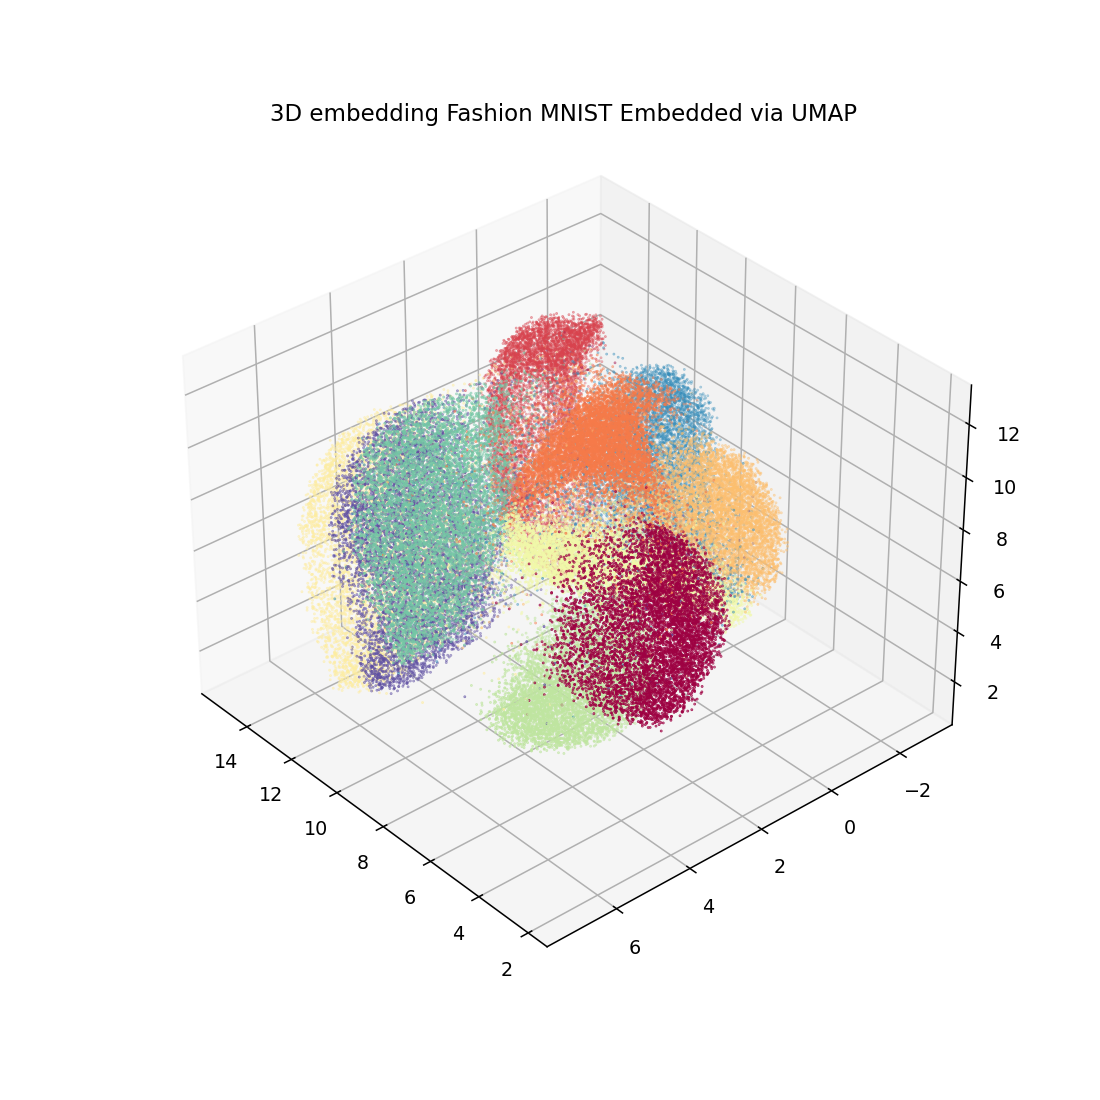

In [27]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=color, s=.2,cmap='Spectral')


plt.title('3D embedding Fashion MNIST Embedded via UMAP');

# UMAP on Fashion MNIST

Fashion MNIST is simialar to the MNIST data set and consists of 10,000 28x28 images of articles of clothing and fashion. The 28x28 images are vectorized into 784x1 vectors. 

Umap creates an embedding from this high dimensional space to lower dimensional space as described by the algorithm description at the top of this notebook. Note the color bar on the right that indicates which article of clothing corresponds to each color. 

In [ ]:
#Fashion mnist
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection
from sklearn import linear_model, ensemble, tree, neighbors, svm

from mnist.loader import MNIST

In [4]:
!ls


 anaconda3	     UMAP
 bashrc		    'UMAP final Spring 2022.ipynb'
 fashion-mnist	    'UMAP with GPU acceleration.ipynb'
 scikit_learn_data


In [3]:
print("Fetching Fashion-Mnist")
print("=========================")
mndata = MNIST('fashion-mnist/data/fashion')
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser 
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']
print("Fashion-Mnist loaded")
print ("=========================")

Fetching Fashion-Mnist
Fashion-Mnist loaded


'========================='

In [29]:
neighbors=15
dim=2
epochs=500
dist=.2

In [30]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding = reducer.fit_transform(data)


UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Mon May  9 10:52:28 2022 Construct fuzzy simplicial set
Mon May  9 10:52:28 2022 Finding Nearest Neighbors
Mon May  9 10:52:28 2022 Building RP forest with 18 trees
Mon May  9 10:52:29 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Mon May  9 10:52:32 2022 Finished Nearest Neighbor Search
Mon May  9 10:52:33 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon May  9 10:54:19 2022 Finished embedding


<IPython.core.display.Javascript object>


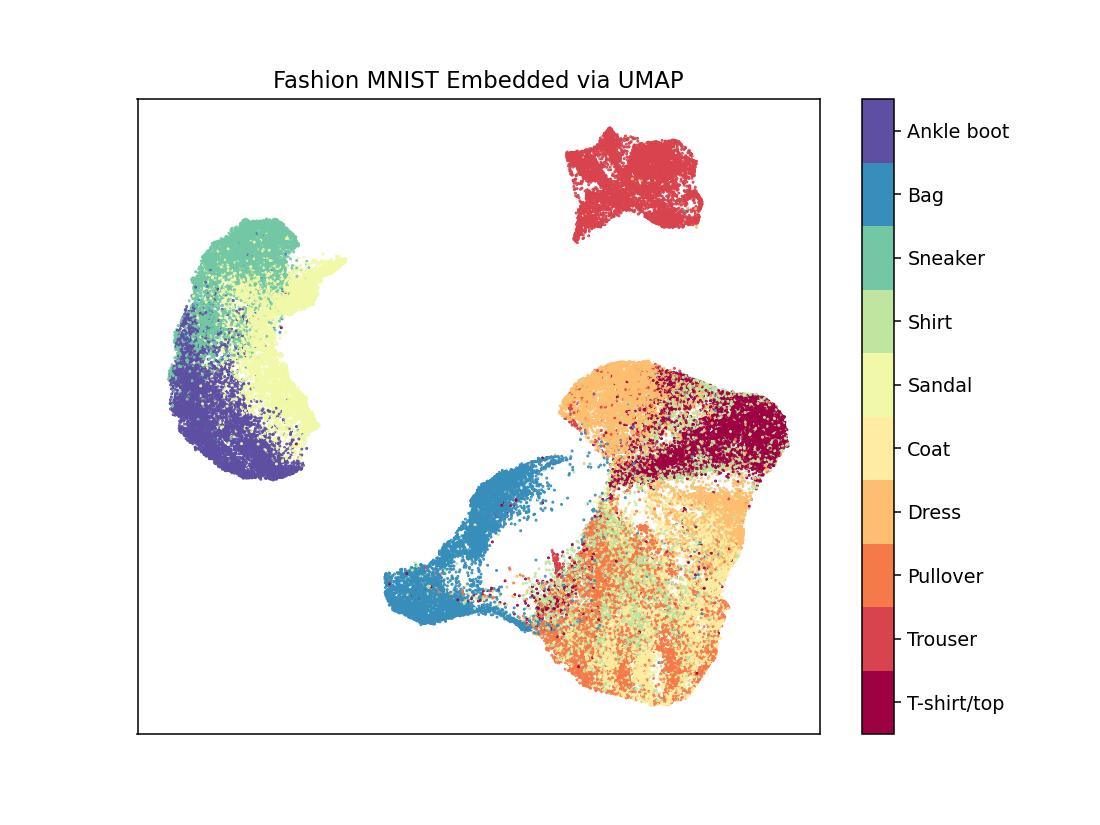

In [31]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

In [ ]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=3, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding = reducer.fit_transform(data)

<IPython.core.display.Javascript object>


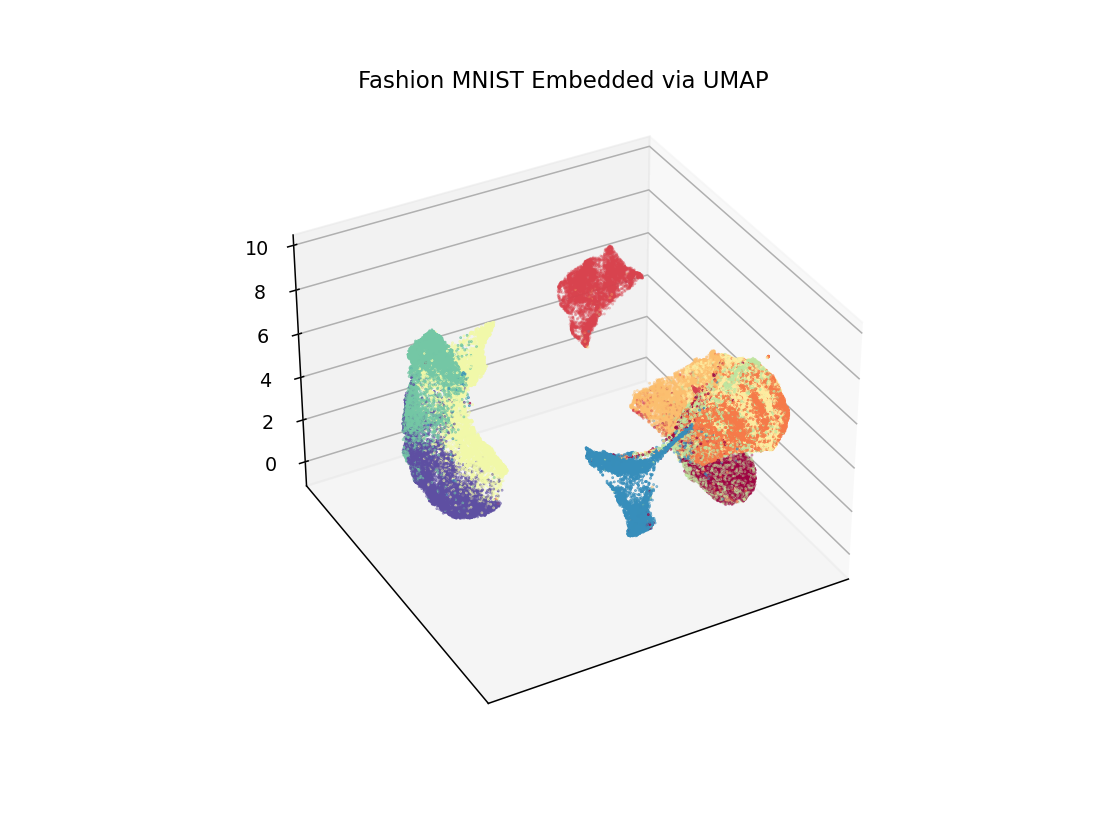

In [34]:
%matplotlib notebook

fig = plt.figure( figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*embedding.T, c=target, s=.2,cmap='Spectral')

#plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

plt.title('Fashion MNIST Embedded via UMAP');

# Parametric UMAP on MNIST


In [1]:
from umap.parametric_umap import ParametricUMAP
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist


In [2]:

dims = (28, 28, 1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 888,194
Trainable params: 888,194
Non-trai

2022-05-09 12:36:03.713324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 12:36:03.747916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-09 12:36:03.747942: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-09 12:36:03.748862: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [3]:
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

In [6]:
embedder = ParametricUMAP(encoder=encoder, dims=dims,verbose=1)

In [7]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(dims=(28, 28, 1), encoder=<keras.engine.sequential.Sequential object at 0x7f36cbf97910>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7f36b030cc10>)
Mon May  9 12:43:43 2022 Construct fuzzy simplicial set
Mon May  9 12:43:44 2022 Finding Nearest Neighbors
Mon May  9 12:43:44 2022 Building RP forest with 17 trees
Mon May  9 12:43:45 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Mon May  9 12:43:48 2022 Finished Nearest Neighbor Search
Mon May  9 12:43:48 2022 Construct embedding


2022-05-09 12:44:12.956605: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 623817872 exceeds 10% of free system memory.


Epoch 1/10
7797/7797 [==============================] - 690s 88ms/step - loss: 0.1056
Epoch 2/10
7797/7797 [==============================] - 635s 81ms/step - loss: 0.0999
Epoch 3/10
7797/7797 [==============================] - 679s 87ms/step - loss: 0.0977
Epoch 4/10
7797/7797 [==============================] - 694s 89ms/step - loss: 0.0965
Epoch 5/10
7797/7797 [==============================] - 671s 86ms/step - loss: 0.0956
Epoch 6/10
7797/7797 [==============================] - 655s 84ms/step - loss: 0.0950
Epoch 7/10
7797/7797 [==============================] - 694s 89ms/step - loss: 0.0946
Epoch 8/10
7797/7797 [==============================] - 740s 95ms/step - loss: 0.0942
Epoch 9/10
7797/7797 [==============================] - 816s 105ms/step - loss: 0.0938
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step
Mon May  9 14:41:58 2022 Finished embedding


In [9]:
embedder.save('/UMAP')

2022-05-09 14:42:11.169602: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


PermissionDeniedError: /UMAP; Permission denied

<IPython.core.display.Javascript object>


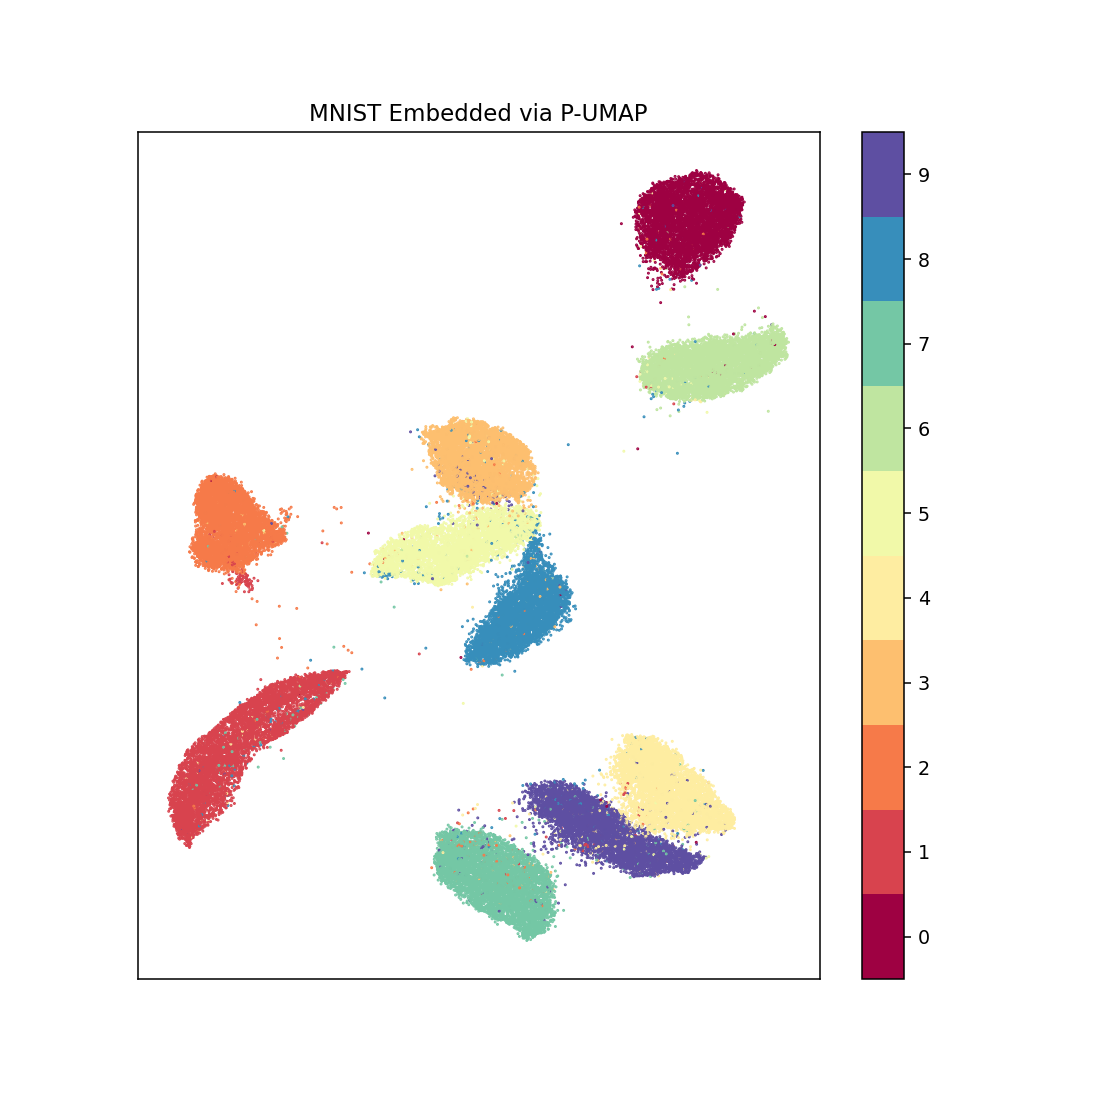

In [31]:
%matplotlib notebook
#target = np.hstack([Y_train, test_labels])
color = mnist.target.astype(int)
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.scatter(embedding[:,0], embedding[:,1], s=0.3, c=color[:60000], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
plt.title('MNIST Embedded via P-UMAP');

# Running UMAP on GPU

In [32]:
import cudf
import cuml